In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('/home/trinhlk2/adhoc/Old/supership/final/scripts')

from config import *
from helper import *

# Processing data

In [3]:
from processing.bang_gia_cuoc import xu_ly_bang_gia_cuoc
from processing.chat_luong_noi_bo import xu_ly_chat_luong_noi_bo_ninja_van, xu_ly_chat_luong_noi_bo_best
from processing.kho_giao_nhan import xu_ly_kho_giao_nhan
from processing.danh_gia_zns import xu_ly_danh_gia_zns
from processing.ngung_giao_nhan import xu_ly_ngung_giao_nhan
from processing.phan_vung_nha_van_chuyen import xu_ly_phan_vung_nha_van_chuyen
from processing.giao_dich import xu_ly_giao_dich, xu_ly_giao_dich_co_khoi_luong, tong_hop_thong_tin_giao_dich

In [4]:
def total_processing():
    print('Xử lý data bảng giá cước...')
    xu_ly_bang_gia_cuoc()
    print('>>> Done\n')
    
    print('Xử lý data chất lượng nội bộ ninja van...')
    xu_ly_chat_luong_noi_bo_ninja_van()
    print('>>> Done\n')
    
    print('Xử lý data chất lượng nội bộ best...')
    xu_ly_chat_luong_noi_bo_best()
    print('>>> Done\n')
    
    print('Xử lý data kho giao nhận...')
    xu_ly_kho_giao_nhan()
    print('>>> Done\n')
    
    print('Xử lý data đánh giá ZNS...')
    xu_ly_danh_gia_zns()
    print('>>> Done\n')
    
    print('Xử lý data ngưng giao nhận...')
    xu_ly_ngung_giao_nhan()
    print('>>> Done\n')
    
    print('Xử lý data phân vùng nhà vận chuyển...')
    xu_ly_phan_vung_nha_van_chuyen()
    print('>>> Done\n')
    
    print('Xử lý data giao dịch...')
    xu_ly_giao_dich()

    print('Xử lý data giao dịch có khối lượng...')
    xu_ly_giao_dich_co_khoi_luong()

    print('Tổng hợp thông tin giao dịch...')
    tong_hop_thong_tin_giao_dich()
    print('>>> Done\n')

In [5]:
total_processing()

Xử lý data bảng giá cước...
>>> Done

Xử lý data chất lượng nội bộ ninja van...
Normalizing province...
Before:  713
After:  713
Normalizing district...
Before:  713
After:  713
>>> Done

Xử lý data chất lượng nội bộ best...
Normalizing province...
Before:  81
After:  81
Normalizing district...
Before:  18
After:  17
>>> Done

Xử lý data kho giao nhận...
NINJA VAN...
Normalizing province...
Before:  713
After:  713
Normalizing district...
Before:  713
After:  713
GHN...
Normalizing province...
Before:  1004
After:  1000
Normalizing district...
Before:  1000
After:  997
BEST...
Normalizing province...
Before:  11570
After:  11570
Normalizing district...
Before:  11570
After:  11509
GHTK...
Normalizing province...
Before:  330
After:  227
Normalizing district...
Before:  227
After:  165
>>> Done

Xử lý data đánh giá ZNS...
Normalizing province...
Before:  4728
After:  4728
Normalizing district...
Before:  4728
After:  4728
>>> Done

Xử lý data ngưng giao nhận...
Normalizing province...
B

# Transform data

In [6]:
from transform.chat_luong_noi_bo import transform_data_chat_luong_noi_bo
from transform.danh_gia_zns import transform_data_danh_gia_zns
from transform.kho_giao_nhan import transform_data_kho_giao_nhan
from transform.ngung_giao_nhan import transform_data_ngung_giao_nhan
from transform.thoi_gian_giao_hang_toan_trinh import transform_data_thoi_gian_giao_hang_toan_trinh
from transform.ti_le_giao_hang import transform_data_ti_le_giao_hang
from transform.tien_giao_dich import transform_data_tien_giao_dich

In [7]:
LIST_NVC = ['ninja_van', 'ghn', 'best', 'shopee_express', 'ghtk', 'viettel_post', 'tikinow']
STATUS_NVC = [nvc + '_stt' for nvc in LIST_NVC]
SCORE_NVC = [nvc + '_score' for nvc in LIST_NVC]

def merge_default_values(target_df, tieu_chi, trong_so, status, score):
    print('Reading normalize address...')
    province_district_norm_df = pd.read_parquet(ROOT_PATH + '/processed_data/province_mapping_district.parquet')

    print('Number rows before: ' + str(len(target_df)))
    target_df = province_district_norm_df.merge(target_df, on=['tinh_thanh', 'quan_huyen'], how='left')
    print('Number rows after: ' + str(len(target_df)))
    target_df['tieu_chi'] = tieu_chi
    target_df['trong_so'] = trong_so
    for col in STATUS_NVC:
        target_df.loc[target_df[col].isna(), col] = status
    for col in SCORE_NVC: 
        target_df.loc[target_df[col].isna(), col] = score
    return target_df
    
def total_transform():

    print('Transform data kho giao nhận...')
    ngung_giao_nhan = transform_data_ngung_giao_nhan()
    assert ngung_giao_nhan.isna().sum().all() == 0, 'Transform data không chính xác'
    
    ngung_giao_nhan = merge_default_values(
        ngung_giao_nhan, 
        tieu_chi='Ngưng giao nhận', 
        trong_so=10,
        status='Bình thường',
        score=1
    )
    print('>>> Done\n')

    print('Transform data đánh giá ZNS...')
    danh_gia_zns = transform_data_danh_gia_zns()
    assert danh_gia_zns.isna().sum().all() == 0, 'Transform data không chính xác'
    
    danh_gia_zns = merge_default_values(
        danh_gia_zns, 
        tieu_chi='Đánh giá ZNS', 
        trong_so=3,
        status='Không có thông tin',
        score=5,
    )
    print('>>> Done\n')

    print('Transform data tỉ lệ giao hàng...')
    ti_le_giao_hang = transform_data_ti_le_giao_hang()
    assert ti_le_giao_hang.isna().sum().all() == 0, 'Transform data không chính xác'
    
    ti_le_giao_hang = merge_default_values(
        ti_le_giao_hang, 
        tieu_chi='Tỉ lệ giao hàng', 
        trong_so=10,
        status={'tong_don': 0, 'ti_le_giao_thanh_cong': -4},
        score=5,
    )
    print('>>> Done\n')
    
    print('Transform data chất lượng nội bộ...')
    chat_luong_noi_bo = transform_data_chat_luong_noi_bo()
    assert chat_luong_noi_bo.isna().sum().all() == 0, 'Transform data không chính xác'
    
    chat_luong_noi_bo = merge_default_values(
        chat_luong_noi_bo, 
        tieu_chi='Chất lượng nội bộ', 
        trong_so=2,
        status='Không có thông tin',
        score=5,
    )
    print('>>> Done\n')

    print('Transform data thời gian giao hàng toàn trình...')
    thoi_gian_giao_hang = transform_data_thoi_gian_giao_hang_toan_trinh()
    assert thoi_gian_giao_hang.isna().sum().all() == 0, 'Transform data không chính xác'
    
    thoi_gian_giao_hang = merge_default_values(
        thoi_gian_giao_hang, 
        tieu_chi='Thời gian giao hàng', 
        trong_so=10,
        status={
            'Nội Thành Tỉnh': 5,
            'Ngoại Thành Tỉnh': 5,
            'Nội Miền': 5,
            'Cận Miền': 5,
        },
        score=5,
    )
    print('>>> Done\n')

    print('Transform data kho giao nhận...')
    kho_giao_nhan = transform_data_kho_giao_nhan()
    assert kho_giao_nhan.isna().sum().all() == 0, 'Transform data không chính xác'
    
    kho_giao_nhan = merge_default_values(
        kho_giao_nhan, 
        tieu_chi='Có kho giao nhận', 
        trong_so=3,
        status='Không có thông tin',
        score=5,
    )
    print('>>> Done\n')
    
    print('Transform data tiền giao dịch...')
    tien_giao_dich = transform_data_tien_giao_dich()
    print('>>> Done\n')

    return (
        ngung_giao_nhan, danh_gia_zns, 
        ti_le_giao_hang, chat_luong_noi_bo, 
        thoi_gian_giao_hang, kho_giao_nhan, 
        tien_giao_dich
    )

In [8]:
(
    ngung_giao_nhan, danh_gia_zns, 
    ti_le_giao_hang, chat_luong_noi_bo, 
    thoi_gian_giao_hang, kho_giao_nhan, 
    tien_giao_dich
)  = total_transform()

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data đánh giá ZNS...
Reading normalize address...
Number rows before: 591
Number rows after: 713
>>> Done

Transform data tỉ lệ giao hàng...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data chất lượng nội bộ...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data thời gian giao hàng toàn trình...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data tiền giao dịch...
>>> Done



# Chỉnh trọng số, combine output

In [9]:
# gắn tinh_thanh_id, quan_huyen_id vào chuỗi json
# mã hóa tiêu chí

## Output total

In [10]:
from functools import reduce

TIEU_CHI_MAPPING_ID = {
    'Ngưng giao nhận': 1, 
    'Đánh giá ZNS': 2, 
    'Tỉ lệ hoàn hàng': 3, 
    'Chất lượng nội bộ': 4,
    'Thời gian giao hàng': 5,
    'Có kho giao nhận': 6,  
}

MAPPING_ID_NVC = {
    'ninja_van': 7,
    'ghn': 2,
    'best': 6,
    'shopee_express': 10,
    'ghtk':  1,
    'viettel_post': 4,
    'tikinow': 12, 
}

LOAI_VAN_CHUYEN_DICT = {
    'Nội Miền': 'Nội Miền',
    'Nội Miền Đặc Biệt': 'Nội Miền',
    'Liên Miền': 'Cận Miền',
    'Liên Miền Đặc Biệt': 'Cận Miền',
    'Liên Vùng': 'Cận Miền',
    'Nội Tỉnh': 'Ngoại Thành Tỉnh',
    'Nội Thành': 'Nội Thành Tỉnh',
}


def transform_final_output():
    
    # Lấy toàn bộ các dữ liệu đã được transform
    *target_df_tuple, tien_giao_dich = total_transform()

    # Tính toán các bảng status
    status_list = []
    for target_df in target_df_tuple:
        for col in LIST_NVC:
            target_df[col] = (
                target_df[['tieu_chi', 'trong_so', col + '_stt', col + '_score']]
                .to_dict(orient='records') 
            )
        target_df = target_df[['tinh_thanh', 'quan_huyen'] + LIST_NVC]
        status_list.append(target_df)
    status = pd.concat(status_list, ignore_index=True)
    
    status_agg_list = []
    for col in LIST_NVC:
        tmp_df = (
            status
            .groupby(['tinh_thanh', 'quan_huyen'])[col]
            .apply(list)
            .reset_index()
        )
        status_agg_list.append(tmp_df)
    status_agg = reduce(lambda x, y: x.merge(y, on=['tinh_thanh', 'quan_huyen'], how='outer'), status_agg_list)
    status_agg_final = pd.melt(
        status_agg, 
        id_vars = ['tinh_thanh', 'quan_huyen'], 
        value_vars =LIST_NVC,
        var_name ='nha_van_chuyen',
        value_name ='status'
    ).rename_axis(None, axis=1)

    status_agg_final['id_nvc'] = status_agg_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
    status_agg_final = status_agg_final[['tinh_thanh', 'quan_huyen', 'id_nvc', 'status']]

    # Tính toán tiền giao dịch
    tien_giao_dich_final = pd.melt(
        tien_giao_dich, 
        id_vars = ['tinh_thanh', 'quan_huyen', 'ma_don_hang'], 
        value_vars =LIST_NVC,
        var_name ='nha_van_chuyen',
        value_name ='monetary'
    ).rename_axis(None, axis=1)
    tien_giao_dich_final['id_nvc'] = tien_giao_dich_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
    tien_giao_dich_final = tien_giao_dich_final[['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc', 'monetary']]

    # Kết hợp dữ liệu status và tiền giao dịch
    final_df = tien_giao_dich_final.merge(status_agg_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc'], how='left')

    # Lưu output dưới dạng json
    with open(ROOT_PATH + '/output/data_api_full.json', 'w', encoding='utf-8') as file:
        final_df.to_json(file, force_ascii=False)

In [11]:
transform_final_output()

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data đánh giá ZNS...
Reading normalize address...
Number rows before: 591
Number rows after: 713
>>> Done

Transform data tỉ lệ giao hàng...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data chất lượng nội bộ...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data thời gian giao hàng toàn trình...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data tiền giao dịch...
>>> Done



In [12]:
data_api_full_json = pd.read_json(ROOT_PATH + '/output/data_api_full.json')
data_api_full_json.loc[data_api_full_json['ma_don_hang'] == 'CTOS102433NM.811050408']

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,monetary,status
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,14500,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
66221,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,2,20000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
132442,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,6,13000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
198663,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,10,12000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
264884,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,1,20000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
331105,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,4,20000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."
397326,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,12,16000,"[{'tieu_chi': 'Ngưng giao nhận', 'trong_so': 1..."


In [13]:
data_api_full_json.loc[0, 'status']

[{'tieu_chi': 'Ngưng giao nhận',
  'trong_so': 10,
  'ninja_van_stt': 'Bình thường',
  'ninja_van_score': 1},
 {'tieu_chi': 'Đánh giá ZNS',
  'trong_so': 3,
  'ninja_van_stt': 'Không có thông tin',
  'ninja_van_score': 5.0},
 {'tieu_chi': 'Tỉ lệ giao hàng',
  'trong_so': 10,
  'ninja_van_stt': {'tong_don': 15, 'ti_le_giao_thanh_cong': 0.9333333333},
  'ninja_van_score': 6.0},
 {'tieu_chi': 'Chất lượng nội bộ',
  'trong_so': 2,
  'ninja_van_stt': 'Ti lệ trên 90% và tổng số đơn giao hàng trên 100 đơn',
  'ninja_van_score': 8},
 {'tieu_chi': 'Thời gian giao hàng',
  'trong_so': 10,
  'ninja_van_stt': {'Cận Miền': 6, 'Ngoại Thành Tỉnh': 5, 'Nội Miền': 4},
  'ninja_van_score': 5.0},
 {'tieu_chi': 'Có kho giao nhận',
  'trong_so': 3,
  'ninja_van_stt': 'Có bưu cục cùng cấp quận/huyện',
  'ninja_van_score': 8}]

## Output API

### Tunning file config.py

In [14]:
LIST_NVC = ['ninja_van', 'ghn', 'best', 'shopee_express', 'ghtk', 'viettel_post', 'tikinow']
STATUS_NVC = [nvc + '_stt' for nvc in LIST_NVC]
SCORE_NVC = [nvc + '_score' for nvc in LIST_NVC]

province_district_norm_df = pd.read_parquet(ROOT_PATH + '/processed_data/province_mapping_district.parquet')

In [15]:
def get_data_api():
    
    # 1. Lấy toàn bộ data
    print('1. Lấy toàn bộ data')
    (
        ngung_giao_nhan, danh_gia_zns, 
        ti_le_giao_hang, chat_luong_noi_bo, 
        thoi_gian_giao_hang, kho_giao_nhan, 
        tien_giao_dich
    )  = total_transform()

    # 2. Xử lý ngưng giao nhận
    print('2. Xử lý ngưng giao nhận')
    ngung_giao_nhan_final = pd.melt(
        ngung_giao_nhan, 
        id_vars = ['tinh_thanh', 'quan_huyen'], 
        value_vars = STATUS_NVC,
        var_name ='nha_van_chuyen',
        value_name ='status'
    ).rename_axis(None, axis=1)
    ngung_giao_nhan_final['id_nvc'] = ngung_giao_nhan_final['nha_van_chuyen'].str.replace('_stt', '').map(MAPPING_ID_NVC)
    ngung_giao_nhan_final = ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen', 'id_nvc', 'status']]
    assert ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen']].drop_duplicates().shape[0] == province_district_norm_df.shape[0], 'Tính toán dữ liệu sai'

    # 3. Xử lý data tiền giao dịch
    print('3. Xử lý data tiền giao dịch')
    tien_giao_dich_final = pd.melt(
        tien_giao_dich, 
        id_vars = ['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'loai'], 
        value_vars =LIST_NVC,
        var_name ='nha_van_chuyen',
        value_name ='monetary'
    ).rename_axis(None, axis=1)
    tien_giao_dich_final['id_nvc'] = tien_giao_dich_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
    tien_giao_dich_final['loai'] = tien_giao_dich_final['loai'].map({
        'noi_mien': 'Nội Miền',
        'can_mien': 'Cận Miền',
        'noi_thanh_tinh': 'Nội Thành Tỉnh',
        'ngoai_thanh_tinh': 'Ngoại Thành Tỉnh',
        'noi_thanh_tphcm_hn': 'Nội Thành Tỉnh',
        'ngoai_thanh_tphcm_hn': 'Ngoại Thành Tỉnh', 
    })
    tien_giao_dich_final = tien_giao_dich_final[['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc', 'loai', 'monetary']]

    # 4. Xử lý data thời gian giao dịch
    print('4. Xử lý data thời gian giao dịch')
    LOAI_VAN_CHUYEN_DICT = {
        'Nội Miền': 'Nội Miền',
        'Nội Miền Đặc Biệt': 'Nội Miền',
        'Liên Miền': 'Cận Miền',
        'Liên Miền Đặc Biệt': 'Cận Miền',
        'Liên Vùng': 'Cận Miền',
        'Nội Tỉnh': 'Ngoại Thành Tỉnh',
        'Nội Thành': 'Nội Thành Tỉnh',
    }
    
    THOI_GIAN_GIAO_HANG_DEFAULT = {
        'Nội Miền': '2-4 ngày',
        'Cận Miền': '3-5 ngày',
        'Nội Thành Tỉnh': '1-3 ngày',
        'Ngoại Thành Tỉnh': '1-3 ngày',
    }
    
    giao_dich_valid = pd.read_parquet(ROOT_PATH + '/processed_data/giao_dich_combine_valid.parquet')
    # Xử lý data
    giao_dich_valid = giao_dich_valid[giao_dich_valid['trang_thai_van_don'].isin([
        'Giao hàng thành công',
        'Đã hoàn thành',
        'Delivered | Giao hàng thành công',
        'Thành công - Phát thành công',
        'Đã giao hàng/Chưa đối soát',
        'Đã đối soát',
    ])]
    
    giao_dich_valid['nha_van_chuyen'] = giao_dich_valid['nha_van_chuyen'].map({
        'BEST Express': 'best',
        'Ninja Van': 'ninja_van',
        'GHN': 'ghn',
        'Shopee Express': 'shopee_express',
        'Viettel Post': 'viettel_post',
        'GHTK': 'ghtk',
        'TikiNow': 'tikinow',
    })
    thoi_gian_giao_hang_df = giao_dich_valid[[
        'tao_luc', 'ma_don_hang', 'nha_van_chuyen',
        'tinh_thanh_giao_hang', 'quan_huyen_giao_hang',
        'so_lan_giao', 'hinh_thuc_gui_hang', 'co_hang_doi_tra',
        'giao_luc', 'loai'
    ]].rename(columns={'tinh_thanh_giao_hang': 'tinh_thanh', 'quan_huyen_giao_hang': 'quan_huyen'})
    
    thoi_gian_giao_hang_df['loai'] = thoi_gian_giao_hang_df['loai'].map(LOAI_VAN_CHUYEN_DICT)
    thoi_gian_giao_hang_df = thoi_gian_giao_hang_df.loc[thoi_gian_giao_hang_df['giao_luc'].notna()]
    thoi_gian_giao_hang_df['thoi_gian_giao_hang'] = (
        thoi_gian_giao_hang_df['giao_luc'] - thoi_gian_giao_hang_df['tao_luc']
    ).astype('timedelta64[h]')
    
    # Transform bảng
    thoi_gian_giao_hang_final = (
        thoi_gian_giao_hang_df
        .groupby(['tinh_thanh', 'quan_huyen', 'nha_van_chuyen', 'loai'])
        .agg(estimate_delivery_time_h=('thoi_gian_giao_hang', 'mean'))
        .reset_index()
    )
    thoi_gian_giao_hang_final['id_nvc'] = thoi_gian_giao_hang_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
    thoi_gian_giao_hang_final['estimate_delivery_time'] = (
        thoi_gian_giao_hang_final['estimate_delivery_time_h'].apply(lambda hour: str(int(hour/24)) + ' - ' + str(int(hour/24)+2) + ' ngày')
    )
    thoi_gian_giao_hang_final = thoi_gian_giao_hang_final[[
        'tinh_thanh', 'quan_huyen', 'id_nvc', 'loai', 
        'estimate_delivery_time_h', 'estimate_delivery_time'
    ]]
    
    # Thời gian giao hàng default
    nvc_df = pd.DataFrame(data={
        'id_nvc': list(MAPPING_ID_NVC.values()),
    })
    loai_van_chuyen_df = pd.DataFrame(THOI_GIAN_GIAO_HANG_DEFAULT.items(), columns=['loai', 'default_delivery_time'])
    loai_van_chuyen_df['default_delivery_time_h'] = [72, 96, 48, 48]
    
    thoi_gian_giao_hang_default = (
        province_district_norm_df
        .merge(
            nvc_df.merge(loai_van_chuyen_df, how='cross'), 
            how='cross'
        )
    )
    
    thoi_gian_giao_hang_final = (
        thoi_gian_giao_hang_default.merge(thoi_gian_giao_hang_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc', 'loai'], how='left')
    )
    thoi_gian_giao_hang_final.loc[
        thoi_gian_giao_hang_final['estimate_delivery_time'].isna(), 
        'estimate_delivery_time'
    ] = thoi_gian_giao_hang_final['default_delivery_time']
    
    thoi_gian_giao_hang_final.loc[
        thoi_gian_giao_hang_final['estimate_delivery_time_h'].isna(), 
        'estimate_delivery_time_h'
    ] = thoi_gian_giao_hang_final['default_delivery_time_h']

    # 5. Xủ lý score (
        # zns_score, ti_le_giao_hang_score, chat_luong_noi_bo_score, 
        # thoi_gian_giao_hang_score, kho_giao_nhan_score
    # )
    print('5. Xủ lý score')
    score_df_list = []
    
    for target_df in [danh_gia_zns, ti_le_giao_hang, chat_luong_noi_bo, thoi_gian_giao_hang, kho_giao_nhan]:
        for col in LIST_NVC:
            target_df[col + '_score'] = target_df[col + '_score']*target_df['trong_so']
        
        target_final_df = pd.melt(
            target_df, 
            id_vars = ['tinh_thanh', 'quan_huyen'], 
            value_vars = SCORE_NVC,
            var_name ='nha_van_chuyen',
            value_name ='score'
        ).rename_axis(None, axis=1)
        target_final_df['id_nvc'] = target_final_df['nha_van_chuyen'].str.replace('_score', '').map(MAPPING_ID_NVC)
        
        score_df_list.append(target_final_df[['tinh_thanh', 'quan_huyen', 'id_nvc', 'score']])
        
    score_df = pd.concat(score_df_list, ignore_index=False)
    score_final = score_df.groupby(['tinh_thanh', 'quan_huyen', 'id_nvc']).mean().reset_index()
    # score_final['score'] = score_final['score']/score_final['score'].max()
    q_lower = score_final['score'].quantile(0.005)
    q_upper = score_final['score'].quantile(0.995)
    score_final.loc[score_final['score'] < q_lower, 'score'] = q_lower
    score_final.loc[score_final['score'] > q_upper, 'score'] = q_upper
    score_final['score'] = (score_final['score'] - q_lower)/(q_upper - q_lower)
    
    score_final['stars'] = 1
    score_final.loc[score_final['score'] > 0.15, 'stars'] = 2
    score_final.loc[score_final['score'] > 0.3, 'stars'] = 3
    score_final.loc[score_final['score'] > 0.5, 'stars'] = 4
    score_final.loc[score_final['score'] > 0.8, 'stars'] = 5

    # 6. Combine api data
    print('6. Combine api data')
    api_data_final = (
        ngung_giao_nhan_final
        .merge(thoi_gian_giao_hang_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc'], how='inner')
        .merge(score_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc'], how='inner')
    )
    api_data_final = tien_giao_dich_final.merge(api_data_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc', 'loai'], how='left')
    assert len(api_data_final) == len(tien_giao_dich_final), 'Transform data không chính xác'

    # 7. Processing api data
    print('7. Processing api data')
    re_nhat_df = api_data_final.groupby(['ma_don_hang'])['monetary'].min().reset_index()
    re_nhat_df['notification'] = 'Rẻ nhất'
    re_nhat_df = re_nhat_df.merge(api_data_final, on=['ma_don_hang', 'monetary'], how='inner')
    
    api_data_final1 = merge_left_only(api_data_final, re_nhat_df, keys=['ma_don_hang', 'monetary'])
    
    nhanh_nhat_df = api_data_final1.groupby(['ma_don_hang'])['estimate_delivery_time_h'].min().reset_index()
    nhanh_nhat_df['notification'] = 'Nhanh nhất'
    nhanh_nhat_df = nhanh_nhat_df.merge(api_data_final1, on=['ma_don_hang', 'estimate_delivery_time_h'], how='inner')
    
    api_data_final2 = merge_left_only(api_data_final1, nhanh_nhat_df, keys=['ma_don_hang', 'estimate_delivery_time_h'])
    
    hieu_qua_nhat_df = api_data_final2.groupby(['ma_don_hang'])['score'].max().reset_index()
    hieu_qua_nhat_df['notification'] = 'Hiệu quả nhất'
    hieu_qua_nhat_df = hieu_qua_nhat_df.merge(api_data_final2, on=['ma_don_hang', 'score'], how='inner')
    
    api_data_final3 = merge_left_only(api_data_final2, hieu_qua_nhat_df, keys=['ma_don_hang', 'score'])
    
    gia_tot_df = api_data_final3.groupby(['ma_don_hang'])['monetary'].min().reset_index()
    gia_tot_df['notification'] = 'Giá tốt'
    gia_tot_df = gia_tot_df.merge(api_data_final3, on=['ma_don_hang', 'monetary'], how='inner')
    
    api_data_final4 = merge_left_only(api_data_final3, gia_tot_df, keys=['ma_don_hang', 'monetary'])
    
    dich_vu_tot_df = api_data_final4.groupby(['ma_don_hang'])['score'].max().reset_index()
    dich_vu_tot_df['notification'] = 'Dịch vụ tốt'
    dich_vu_tot_df = dich_vu_tot_df.merge(api_data_final4, on=['ma_don_hang', 'score'], how='inner')
    
    api_data_final5 = merge_left_only(api_data_final4, dich_vu_tot_df, keys=['ma_don_hang', 'score'])
    api_data_final5['notification'] = 'Bình thường'

    api_data_final = pd.concat([
        re_nhat_df,
        nhanh_nhat_df,
        hieu_qua_nhat_df,
        gia_tot_df,
        dich_vu_tot_df,
        api_data_final5
    ], ignore_index=True)
    api_data_final = api_data_final[[
        'tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc',
        'loai', 'status', 'monetary', 'estimate_delivery_time', 
        'score', 'stars', 'notification'
    ]]

    assert api_data_final.isna().sum().all() == 0, 'Transform data không chính xác'
    
    # Lưu output dưới dạng json
    with open(ROOT_PATH + '/output/data_api.json', 'w', encoding='utf-8') as file:
        api_data_final.to_json(file, force_ascii=False)
        
    return api_data_final

In [16]:
api_data_final = get_data_api()

1. Lấy toàn bộ data
Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data đánh giá ZNS...
Reading normalize address...
Number rows before: 591
Number rows after: 713
>>> Done

Transform data tỉ lệ giao hàng...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data chất lượng nội bộ...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data thời gian giao hàng toàn trình...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data tiền giao dịch...
>>> Done

2. Xử lý ngưng giao nhận
3. Xử lý data tiền giao dịch
4. Xử lý data thời gian giao dịch
5. Xủ lý score
6. Combine api data
7. Processing api data


In [17]:
api_data_final[api_data_final['ma_don_hang'] == 'CTOS102433NM.811050408']

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,status,monetary,estimate_delivery_time,score,stars,notification
12505,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,10,Nội Miền,Bình thường,12000,2 - 4 ngày,0.574980,4,Rẻ nhất
81375,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,6,Nội Miền,Bình thường,13000,1 - 3 ngày,0.739655,4,Nhanh nhất
150849,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,2,Nội Miền,Bình thường,20000,2-4 ngày,0.720531,4,Hiệu quả nhất
217984,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,Bình thường,14500,2 - 4 ngày,0.713094,4,Giá tốt
286911,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,1,Nội Miền,Bình thường,20000,2-4 ngày,0.605790,4,Dịch vụ tốt
357686,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,4,Nội Miền,Bình thường,20000,2-4 ngày,0.489987,3,Bình thường
357687,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,12,Nội Miền,Bình thường,16000,2-4 ngày,0.489987,3,Bình thường


In [39]:
api_data_final.shape

(463547, 11)

In [ ]:
api_data_final.to_excel(ROOT_PATH + '/output/data_api.xlsx')

In [30]:
with open(ROOT_PATH + '/output/data_api_sample.json', 'w', encoding='utf-8') as file:
    api_data_final.head(1000).to_json(file, force_ascii=False)

In [31]:
import seaborn as sns

In [32]:
# 1. Lấy toàn bộ data
print('1. Lấy toàn bộ data')
(
    ngung_giao_nhan, danh_gia_zns, 
    ti_le_giao_hang, chat_luong_noi_bo, 
    thoi_gian_giao_hang, kho_giao_nhan, 
    tien_giao_dich
)  = total_transform()

# 2. Xử lý ngưng giao nhận
print('2. Xử lý ngưng giao nhận')
ngung_giao_nhan_final = pd.melt(
    ngung_giao_nhan, 
    id_vars = ['tinh_thanh', 'quan_huyen'], 
    value_vars = STATUS_NVC,
    var_name ='nha_van_chuyen',
    value_name ='status'
).rename_axis(None, axis=1)
ngung_giao_nhan_final['id_nvc'] = ngung_giao_nhan_final['nha_van_chuyen'].str.replace('_stt', '').map(MAPPING_ID_NVC)
ngung_giao_nhan_final = ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen', 'id_nvc', 'status']]
assert ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen']].drop_duplicates().shape[0] == province_district_norm_df.shape[0], 'Tính toán dữ liệu sai'

# 3. Xử lý data tiền giao dịch
print('3. Xử lý data tiền giao dịch')
tien_giao_dich_final = pd.melt(
    tien_giao_dich, 
    id_vars = ['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'loai'], 
    value_vars =LIST_NVC,
    var_name ='nha_van_chuyen',
    value_name ='monetary'
).rename_axis(None, axis=1)
tien_giao_dich_final['id_nvc'] = tien_giao_dich_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
tien_giao_dich_final['loai'] = tien_giao_dich_final['loai'].map({
    'noi_mien': 'Nội Miền',
    'can_mien': 'Cận Miền',
    'noi_thanh_tinh': 'Nội Thành Tỉnh',
    'ngoai_thanh_tinh': 'Ngoại Thành Tỉnh',
    'noi_thanh_tphcm_hn': 'Nội Thành Tỉnh',
    'ngoai_thanh_tphcm_hn': 'Ngoại Thành Tỉnh', 
})
tien_giao_dich_final = tien_giao_dich_final[['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc', 'loai', 'monetary']]

# 4. Xử lý data thời gian giao dịch
print('4. Xử lý data thời gian giao dịch')
LOAI_VAN_CHUYEN_DICT = {
    'Nội Miền': 'Nội Miền',
    'Nội Miền Đặc Biệt': 'Nội Miền',
    'Liên Miền': 'Cận Miền',
    'Liên Miền Đặc Biệt': 'Cận Miền',
    'Liên Vùng': 'Cận Miền',
    'Nội Tỉnh': 'Ngoại Thành Tỉnh',
    'Nội Thành': 'Nội Thành Tỉnh',
}

THOI_GIAN_GIAO_HANG_DEFAULT = {
    'Nội Miền': '2-4 ngày',
    'Cận Miền': '3-5 ngày',
    'Nội Thành Tỉnh': '1-3 ngày',
    'Ngoại Thành Tỉnh': '1-3 ngày',
}

giao_dich_valid = pd.read_parquet(ROOT_PATH + '/processed_data/giao_dich_combine_valid.parquet')
# Xử lý data
giao_dich_valid = giao_dich_valid[giao_dich_valid['trang_thai_van_don'].isin([
    'Giao hàng thành công',
    'Đã hoàn thành',
    'Delivered | Giao hàng thành công',
    'Thành công - Phát thành công',
    'Đã giao hàng/Chưa đối soát',
    'Đã đối soát',
])]

giao_dich_valid['nha_van_chuyen'] = giao_dich_valid['nha_van_chuyen'].map({
    'BEST Express': 'best',
    'Ninja Van': 'ninja_van',
    'GHN': 'ghn',
    'Shopee Express': 'shopee_express',
    'Viettel Post': 'viettel_post',
    'GHTK': 'ghtk',
    'TikiNow': 'tikinow',
})
thoi_gian_giao_hang_df = giao_dich_valid[[
    'tao_luc', 'ma_don_hang', 'nha_van_chuyen',
    'tinh_thanh_giao_hang', 'quan_huyen_giao_hang',
    'so_lan_giao', 'hinh_thuc_gui_hang', 'co_hang_doi_tra',
    'giao_luc', 'loai'
]].rename(columns={'tinh_thanh_giao_hang': 'tinh_thanh', 'quan_huyen_giao_hang': 'quan_huyen'})

thoi_gian_giao_hang_df['loai'] = thoi_gian_giao_hang_df['loai'].map(LOAI_VAN_CHUYEN_DICT)
thoi_gian_giao_hang_df = thoi_gian_giao_hang_df.loc[thoi_gian_giao_hang_df['giao_luc'].notna()]
thoi_gian_giao_hang_df['thoi_gian_giao_hang'] = (
    thoi_gian_giao_hang_df['giao_luc'] - thoi_gian_giao_hang_df['tao_luc']
).astype('timedelta64[h]')

# Transform bảng
thoi_gian_giao_hang_final = (
    thoi_gian_giao_hang_df
    .groupby(['tinh_thanh', 'quan_huyen', 'nha_van_chuyen', 'loai'])
    .agg(estimate_delivery_time_h=('thoi_gian_giao_hang', 'mean'))
    .reset_index()
)
thoi_gian_giao_hang_final['id_nvc'] = thoi_gian_giao_hang_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
thoi_gian_giao_hang_final['estimate_delivery_time'] = (
    thoi_gian_giao_hang_final['estimate_delivery_time_h'].apply(lambda hour: str(int(hour/24)) + ' - ' + str(int(hour/24)+2) + ' ngày')
)
thoi_gian_giao_hang_final = thoi_gian_giao_hang_final[[
    'tinh_thanh', 'quan_huyen', 'id_nvc', 'loai', 
    'estimate_delivery_time_h', 'estimate_delivery_time'
]]

# Thời gian giao hàng default
nvc_df = pd.DataFrame(data={
    'id_nvc': list(MAPPING_ID_NVC.values()),
})
loai_van_chuyen_df = pd.DataFrame(THOI_GIAN_GIAO_HANG_DEFAULT.items(), columns=['loai', 'default_delivery_time'])
loai_van_chuyen_df['default_delivery_time_h'] = [72, 96, 48, 48]

thoi_gian_giao_hang_default = (
    province_district_norm_df
    .merge(
        nvc_df.merge(loai_van_chuyen_df, how='cross'), 
        how='cross'
    )
)

thoi_gian_giao_hang_final = (
    thoi_gian_giao_hang_default.merge(thoi_gian_giao_hang_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc', 'loai'], how='left')
)
thoi_gian_giao_hang_final.loc[
    thoi_gian_giao_hang_final['estimate_delivery_time'].isna(), 
    'estimate_delivery_time'
] = thoi_gian_giao_hang_final['default_delivery_time']

thoi_gian_giao_hang_final.loc[
    thoi_gian_giao_hang_final['estimate_delivery_time_h'].isna(), 
    'estimate_delivery_time_h'
] = thoi_gian_giao_hang_final['default_delivery_time_h']

# 5. Xủ lý score (
    # zns_score, ti_le_giao_hang_score, chat_luong_noi_bo_score, 
    # thoi_gian_giao_hang_score, kho_giao_nhan_score
# )
print('5. Xủ lý score')
score_df_list = []

for target_df in [danh_gia_zns, ti_le_giao_hang, chat_luong_noi_bo, thoi_gian_giao_hang, kho_giao_nhan]:
    for col in LIST_NVC:
        target_df[col + '_score'] = target_df[col + '_score']*target_df['trong_so']
    
    target_final_df = pd.melt(
        target_df, 
        id_vars = ['tinh_thanh', 'quan_huyen'], 
        value_vars = SCORE_NVC,
        var_name ='nha_van_chuyen',
        value_name ='score'
    ).rename_axis(None, axis=1)
    target_final_df['id_nvc'] = target_final_df['nha_van_chuyen'].str.replace('_score', '').map(MAPPING_ID_NVC)
    
    score_df_list.append(target_final_df[['tinh_thanh', 'quan_huyen', 'id_nvc', 'score']])
    
score_df = pd.concat(score_df_list, ignore_index=False)
score_final = score_df.groupby(['tinh_thanh', 'quan_huyen', 'id_nvc']).mean().reset_index()

1. Lấy toàn bộ data
Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data đánh giá ZNS...
Reading normalize address...
Number rows before: 591
Number rows after: 713
>>> Done

Transform data tỉ lệ giao hàng...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data chất lượng nội bộ...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data thời gian giao hàng toàn trình...
Reading normalize address...
Number rows before: 704
Number rows after: 713
>>> Done

Transform data kho giao nhận...
Reading normalize address...
Number rows before: 713
Number rows after: 713
>>> Done

Transform data tiền giao dịch...
>>> Done

2. Xử lý ngưng giao nhận
3. Xử lý data tiền giao dịch
4. Xử lý data thời gian giao dịch
5. Xủ lý score


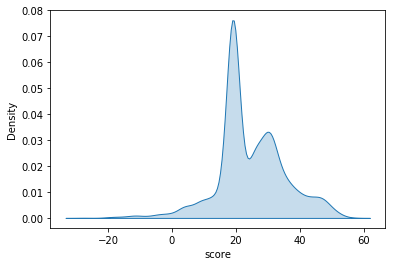

In [33]:
sns.kdeplot(score_final['score'], shade = True)

In [34]:
q_lower = score_final['score'].quantile(0.005)
q_upper = score_final['score'].quantile(0.995)
score_final.loc[score_final['score'] < q_lower, 'score'] = q_lower
score_final.loc[score_final['score'] > q_upper, 'score'] = q_upper
score_final['score'] = (score_final['score'] - q_lower)/(q_upper - q_lower)

score_final['stars'] = 1
score_final.loc[score_final['score'] > 0.15, 'stars'] = 2
score_final.loc[score_final['score'] > 0.3, 'stars'] = 3
score_final.loc[score_final['score'] > 0.5, 'stars'] = 4
score_final.loc[score_final['score'] > 0.8, 'stars'] = 5

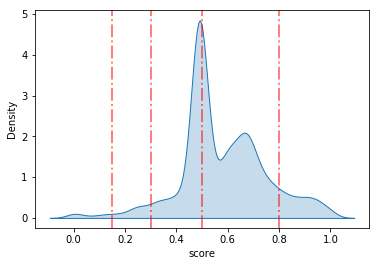

In [35]:
import matplotlib.pyplot as plt
sns.kdeplot(score_final['score'], shade = True)
plt.axvline(0.15, color='red', alpha=0.5, lw=2, linestyle='dashdot')
plt.axvline(0.3, color='red', alpha=0.5, lw=2, linestyle='dashdot')
plt.axvline(0.5, color='red', alpha=0.5, lw=2, linestyle='dashdot')
plt.axvline(0.8, color='red', alpha=0.5, lw=2, linestyle='dashdot')

In [36]:
api_data_final['stars'].value_counts(dropna=False)

4    208709
3    149566
5     90576
2      8273
1      6423
Name: stars, dtype: int64

In [37]:
# with open(ROOT_PATH + '/output/data_api_sample.json', 'w', encoding='utf-8') as file:
#     api_data_final.head(1000).to_json(file, force_ascii=False)

In [40]:
data_api_json = pd.read_json(ROOT_PATH + '/output/data_api.json')
data_api_json.shape

(463547, 11)

## Test

In [15]:
(
    len(ngung_giao_nhan), len(danh_gia_zns), 
    len(ti_le_giao_hang), len(chat_luong_noi_bo), 
    len(thoi_gian_giao_hang), len(kho_giao_nhan), 
    len(tien_giao_dich)
)

(713, 713, 713, 713, 713, 713, 66221)

In [16]:
ngung_giao_nhan_final = pd.melt(
    ngung_giao_nhan, 
    id_vars = ['tinh_thanh', 'quan_huyen'], 
    value_vars = STATUS_NVC,
    var_name ='nha_van_chuyen',
    value_name ='status'
).rename_axis(None, axis=1)
ngung_giao_nhan_final['id_nvc'] = ngung_giao_nhan_final['nha_van_chuyen'].str.replace('_stt', '').map(MAPPING_ID_NVC)
ngung_giao_nhan_final = ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen', 'id_nvc', 'status']]
assert ngung_giao_nhan_final[['tinh_thanh', 'quan_huyen']].drop_duplicates().shape[0] == province_district_norm_df.shape[0], 'Tính toán dữ liệu sai'
ngung_giao_nhan_final

,tinh_thanh,quan_huyen,id_nvc,status
0,Thành phố Cần Thơ,Quận Ninh Kiều,7,Bình thường
1,Thành phố Cần Thơ,Huyện Cờ Đỏ,7,Bình thường
2,Thành phố Cần Thơ,Huyện Phong Điền,7,Bình thường
3,Thành phố Cần Thơ,Huyện Thới Lai,7,Bình thường
4,Thành phố Cần Thơ,Huyện Vĩnh Thạnh,7,Bình thường
...,...,...,...,...
4986,Tỉnh Yên Bái,Huyện Trấn Yên,12,Bình thường
4987,Tỉnh Yên Bái,Huyện Văn Chấn,12,Bình thường
4988,Tỉnh Yên Bái,Huyện Văn Yên,12,Bình thường
4989,Tỉnh Yên Bái,Huyện Yên Bình,12,Bình thường


In [85]:
tien_giao_dich_final = pd.melt(
    tien_giao_dich, 
    id_vars = ['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'loai'], 
    value_vars =LIST_NVC,
    var_name ='nha_van_chuyen',
    value_name ='monetary'
).rename_axis(None, axis=1)
tien_giao_dich_final['id_nvc'] = tien_giao_dich_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
tien_giao_dich_final['loai'] = tien_giao_dich_final['loai'].map({
    'noi_mien': 'Nội Miền',
    'can_mien': 'Cận Miền',
    'noi_thanh_tinh': 'Nội Thành Tỉnh',
    'ngoai_thanh_tinh': 'Ngoại Thành Tỉnh',
    'noi_thanh_tphcm_hn': 'Nội Thành Tỉnh',
    'ngoai_thanh_tphcm_hn': 'Ngoại Thành Tỉnh', 
})
tien_giao_dich_final = tien_giao_dich_final[['tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc', 'loai', 'monetary']]
tien_giao_dich_final

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,monetary
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,14500
1,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811062335,7,Nội Miền,14500
2,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811066013,7,Nội Miền,14500
3,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS191192LM.810993802,7,Cận Miền,13000
4,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS204441LM.810976816,7,Cận Miền,16500
...,...,...,...,...,...,...
463542,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS973681LM.811036592,12,Cận Miền,16000
463543,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.810959513,12,Cận Miền,16000
463544,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.811040759,12,Cận Miền,16000
463545,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS986349LM.810972226,12,Cận Miền,16000


In [107]:
LOAI_VAN_CHUYEN_DICT = {
    'Nội Miền': 'Nội Miền',
    'Nội Miền Đặc Biệt': 'Nội Miền',
    'Liên Miền': 'Cận Miền',
    'Liên Miền Đặc Biệt': 'Cận Miền',
    'Liên Vùng': 'Cận Miền',
    'Nội Tỉnh': 'Ngoại Thành Tỉnh',
    'Nội Thành': 'Nội Thành Tỉnh',
}

THOI_GIAN_GIAO_HANG_DEFAULT = {
    'Nội Miền': '2-4 ngày',
    'Cận Miền': '3-5 ngày',
    'Nội Thành Tỉnh': '1-3 ngày',
    'Ngoại Thành Tỉnh': '1-3 ngày',
}

giao_dich_valid = pd.read_parquet(ROOT_PATH + '/processed_data/giao_dich_combine_valid.parquet')
# Xử lý data
giao_dich_valid = giao_dich_valid[giao_dich_valid['trang_thai_van_don'].isin([
    'Giao hàng thành công',
    'Đã hoàn thành',
    'Delivered | Giao hàng thành công',
    'Thành công - Phát thành công',
    'Đã giao hàng/Chưa đối soát',
    'Đã đối soát',
])]

giao_dich_valid['nha_van_chuyen'] = giao_dich_valid['nha_van_chuyen'].map({
    'BEST Express': 'best',
    'Ninja Van': 'ninja_van',
    'GHN': 'ghn',
    'Shopee Express': 'shopee_express',
    'Viettel Post': 'viettel_post',
    'GHTK': 'ghtk',
    'TikiNow': 'tikinow',
})
thoi_gian_giao_hang_df = giao_dich_valid[[
    'tao_luc', 'ma_don_hang', 'nha_van_chuyen',
    'tinh_thanh_giao_hang', 'quan_huyen_giao_hang',
    'so_lan_giao', 'hinh_thuc_gui_hang', 'co_hang_doi_tra',
    'giao_luc', 'loai'
]].rename(columns={'tinh_thanh_giao_hang': 'tinh_thanh', 'quan_huyen_giao_hang': 'quan_huyen'})

thoi_gian_giao_hang_df['loai'] = thoi_gian_giao_hang_df['loai'].map(LOAI_VAN_CHUYEN_DICT)
thoi_gian_giao_hang_df = thoi_gian_giao_hang_df.loc[thoi_gian_giao_hang_df['giao_luc'].notna()]
thoi_gian_giao_hang_df['thoi_gian_giao_hang'] = (
    thoi_gian_giao_hang_df['giao_luc'] - thoi_gian_giao_hang_df['tao_luc']
).astype('timedelta64[h]')

# Transform bảng
thoi_gian_giao_hang_final = (
    thoi_gian_giao_hang_df
    .groupby(['tinh_thanh', 'quan_huyen', 'nha_van_chuyen', 'loai'])
    .agg(estimate_delivery_time_h=('thoi_gian_giao_hang', 'mean'))
    .reset_index()
)
thoi_gian_giao_hang_final['id_nvc'] = thoi_gian_giao_hang_final['nha_van_chuyen'].map(MAPPING_ID_NVC)
thoi_gian_giao_hang_final['estimate_delivery_time'] = (
    thoi_gian_giao_hang_final['estimate_delivery_time_h'].apply(lambda hour: str(int(hour/24)) + ' - ' + str(int(hour/24)+2) + ' ngày')
)
thoi_gian_giao_hang_final = thoi_gian_giao_hang_final[[
    'tinh_thanh', 'quan_huyen', 'id_nvc', 'loai', 
    'estimate_delivery_time_h', 'estimate_delivery_time'
]]

# Thời gian giao hàng default
nvc_df = pd.DataFrame(data={
    'id_nvc': list(MAPPING_ID_NVC.values()),
})
loai_van_chuyen_df = pd.DataFrame(THOI_GIAN_GIAO_HANG_DEFAULT.items(), columns=['loai', 'default_delivery_time'])
loai_van_chuyen_df['default_delivery_time_h'] = [72, 96, 48, 48]

thoi_gian_giao_hang_default = (
    province_district_norm_df
    .merge(
        nvc_df.merge(loai_van_chuyen_df, how='cross'), 
        how='cross'
    )
)

thoi_gian_giao_hang_final = (
    thoi_gian_giao_hang_default.merge(thoi_gian_giao_hang_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc', 'loai'], how='left')
)
thoi_gian_giao_hang_final.loc[
    thoi_gian_giao_hang_final['estimate_delivery_time'].isna(), 
    'estimate_delivery_time'
] = thoi_gian_giao_hang_final['default_delivery_time']

thoi_gian_giao_hang_final.loc[
    thoi_gian_giao_hang_final['estimate_delivery_time_h'].isna(), 
    'estimate_delivery_time_h'
] = thoi_gian_giao_hang_final['default_delivery_time_h']

# thoi_gian_giao_hang_final = thoi_gian_giao_hang_final[[
#     'tinh_thanh', 'quan_huyen', 'id_nvc', 'loai', 
#     'estimate_delivery_time_h', 'estimate_delivery_time'
# ]]
thoi_gian_giao_hang_final

,tinh_thanh,quan_huyen,id_nvc,loai,default_delivery_time,default_delivery_time_h,estimate_delivery_time_h,estimate_delivery_time
0,Thành phố Cần Thơ,Quận Ninh Kiều,7,Nội Miền,2-4 ngày,72,35.271429,1 - 3 ngày
1,Thành phố Cần Thơ,Quận Ninh Kiều,7,Cận Miền,3-5 ngày,96,78.810811,3 - 5 ngày
2,Thành phố Cần Thơ,Quận Ninh Kiều,7,Nội Thành Tỉnh,1-3 ngày,48,48.000000,1-3 ngày
3,Thành phố Cần Thơ,Quận Ninh Kiều,7,Ngoại Thành Tỉnh,1-3 ngày,48,48.000000,1-3 ngày
4,Thành phố Cần Thơ,Quận Ninh Kiều,2,Nội Miền,2-4 ngày,72,33.833333,1 - 3 ngày
...,...,...,...,...,...,...,...,...
19959,Tỉnh Yên Bái,Thị xã Nghĩa Lộ,4,Ngoại Thành Tỉnh,1-3 ngày,48,48.000000,1-3 ngày
19960,Tỉnh Yên Bái,Thị xã Nghĩa Lộ,12,Nội Miền,2-4 ngày,72,72.000000,2-4 ngày
19961,Tỉnh Yên Bái,Thị xã Nghĩa Lộ,12,Cận Miền,3-5 ngày,96,96.000000,3-5 ngày
19962,Tỉnh Yên Bái,Thị xã Nghĩa Lộ,12,Nội Thành Tỉnh,1-3 ngày,48,48.000000,1-3 ngày


In [108]:
score_df_list = []

for target_df in [danh_gia_zns, ti_le_giao_hang, chat_luong_noi_bo, thoi_gian_giao_hang, kho_giao_nhan]:
    for col in LIST_NVC:
        target_df[col + '_score'] = target_df[col + '_score']*target_df['trong_so']
    # print(len(target_df))
    
    target_final_df = pd.melt(
        target_df, 
        id_vars = ['tinh_thanh', 'quan_huyen'], 
        value_vars = SCORE_NVC,
        var_name ='nha_van_chuyen',
        value_name ='score'
    ).rename_axis(None, axis=1)
    target_final_df['id_nvc'] = target_final_df['nha_van_chuyen'].str.replace('_score', '').map(MAPPING_ID_NVC)
    
    score_df_list.append(target_final_df[['tinh_thanh', 'quan_huyen', 'id_nvc', 'score']])
    
score_df = pd.concat(score_df_list, ignore_index=False)
score_final = score_df.groupby(['tinh_thanh', 'quan_huyen', 'id_nvc']).mean().reset_index()
score_final['score'] = score_final['score']/score_final['score'].max()

score_final['stars'] = 1
score_final.loc[score_final['score'] > 0.6, 'stars'] = 2
score_final.loc[score_final['score'] > 0.8, 'stars'] = 3
score_final.loc[score_final['score'] > 0.92, 'stars'] = 4
score_final.loc[score_final['score'] > 0.96, 'stars'] = 5
score_final

,tinh_thanh,quan_huyen,id_nvc,score,stars
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,1,0.210076,1
1,Thành phố Cần Thơ,Huyện Cờ Đỏ,2,0.212421,1
2,Thành phố Cần Thơ,Huyện Cờ Đỏ,4,0.110543,1
3,Thành phố Cần Thơ,Huyện Cờ Đỏ,6,0.496469,1
4,Thành phố Cần Thơ,Huyện Cờ Đỏ,7,0.246518,1
...,...,...,...,...,...
4986,Tỉnh Đồng Tháp,Thành phố Sa Đéc,4,0.304685,1
4987,Tỉnh Đồng Tháp,Thành phố Sa Đéc,6,0.785893,2
4988,Tỉnh Đồng Tháp,Thành phố Sa Đéc,7,0.708842,2
4989,Tỉnh Đồng Tháp,Thành phố Sa Đéc,10,0.158785,1


In [109]:
score_df.shape

(24955, 4)

In [110]:
24955 == 713 * 7 * 5 # 5 df, 7 nvc, 713 quan_huyen

True

In [111]:
score_final['score'].min(), score_final['score'].max()

(-0.9912073174261647, 1.0)

In [112]:
ngung_giao_nhan_final.shape, tien_giao_dich_final.shape, thoi_gian_giao_hang_final.shape, score_final.shape

((4991, 4), (463547, 6), (19964, 8), (4991, 5))

In [113]:
tien_giao_dich_final

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,monetary
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,14500
1,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811062335,7,Nội Miền,14500
2,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811066013,7,Nội Miền,14500
3,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS191192LM.810993802,7,Cận Miền,13000
4,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS204441LM.810976816,7,Cận Miền,16500
...,...,...,...,...,...,...
463542,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS973681LM.811036592,12,Cận Miền,16000
463543,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.810959513,12,Cận Miền,16000
463544,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.811040759,12,Cận Miền,16000
463545,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS986349LM.810972226,12,Cận Miền,16000


In [168]:
api_data_final = (
    ngung_giao_nhan_final
    .merge(thoi_gian_giao_hang_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc'], how='inner')
    .merge(score_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc'], how='inner')
)
api_data_final = tien_giao_dich_final.merge(api_data_final, on=['tinh_thanh', 'quan_huyen', 'id_nvc', 'loai'], how='left')
assert len(api_data_final) == len(tien_giao_dich_final), 'Transform data sai'
api_data_final

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,monetary,status,default_delivery_time,default_delivery_time_h,estimate_delivery_time_h,estimate_delivery_time,score,stars
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,14500,Bình thường,2-4 ngày,72,70.0,2 - 4 ngày,0.246518,1
1,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811062335,7,Nội Miền,14500,Bình thường,2-4 ngày,72,70.0,2 - 4 ngày,0.246518,1
2,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811066013,7,Nội Miền,14500,Bình thường,2-4 ngày,72,70.0,2 - 4 ngày,0.246518,1
3,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS191192LM.810993802,7,Cận Miền,13000,Bình thường,3-5 ngày,96,76.4,3 - 5 ngày,0.246518,1
4,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS204441LM.810976816,7,Cận Miền,16500,Bình thường,3-5 ngày,96,76.4,3 - 5 ngày,0.246518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463542,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS973681LM.811036592,12,Cận Miền,16000,Bình thường,3-5 ngày,96,96.0,3-5 ngày,0.110543,1
463543,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.810959513,12,Cận Miền,16000,Bình thường,3-5 ngày,96,96.0,3-5 ngày,0.110543,1
463544,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.811040759,12,Cận Miền,16000,Bình thường,3-5 ngày,96,96.0,3-5 ngày,0.110543,1
463545,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS986349LM.810972226,12,Cận Miền,16000,Bình thường,3-5 ngày,96,96.0,3-5 ngày,0.110543,1


In [169]:
tien_giao_dich_final['ma_don_hang'].nunique(), tien_giao_dich_final.shape

(66221, (463547, 6))

In [170]:
463547 == 66221*7

True

In [171]:
api_data_final['score'].describe()

count    463547.000000
mean          0.315034
std           0.277297
min          -0.991207
25%           0.110543
50%           0.249407
75%           0.480602
max           1.000000
Name: score, dtype: float64

In [172]:
api_data_final['stars'].value_counts()

1    374906
2     56740
3     15659
5     10091
4      6151
Name: stars, dtype: int64

In [173]:
api_data_final[api_data_final['ma_don_hang'] == 'CTOS102433NM.811050408']

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,monetary,status,default_delivery_time,default_delivery_time_h,estimate_delivery_time_h,estimate_delivery_time,score,stars
0,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,14500,Bình thường,2-4 ngày,72,70.00,2 - 4 ngày,0.246518,1
66221,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,2,Nội Miền,20000,Bình thường,2-4 ngày,72,72.00,2-4 ngày,0.212421,1
132442,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,6,Nội Miền,13000,Bình thường,2-4 ngày,72,31.20,1 - 3 ngày,0.496469,1
198663,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,10,Nội Miền,12000,Bình thường,2-4 ngày,72,48.15,2 - 4 ngày,0.373867,1
264884,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,1,Nội Miền,20000,Bình thường,2-4 ngày,72,72.00,2-4 ngày,0.210076,1
331105,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,4,Nội Miền,20000,Bình thường,2-4 ngày,72,72.00,2-4 ngày,0.110543,1
397326,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,12,Nội Miền,16000,Bình thường,2-4 ngày,72,72.00,2-4 ngày,0.110543,1


In [174]:
re_nhat_df = api_data_final.groupby(['ma_don_hang'])['monetary'].min().reset_index()
re_nhat_df['notification'] = 'Rẻ nhất'
re_nhat_df = re_nhat_df.merge(api_data_final, on=['ma_don_hang', 'monetary'], how='inner')

api_data_final1 = merge_left_only(api_data_final, re_nhat_df, keys=['ma_don_hang', 'monetary'])

nhanh_nhat_df = api_data_final1.groupby(['ma_don_hang'])['estimate_delivery_time_h'].min().reset_index()
nhanh_nhat_df['notification'] = 'Nhanh nhất'
nhanh_nhat_df = nhanh_nhat_df.merge(api_data_final1, on=['ma_don_hang', 'estimate_delivery_time_h'], how='inner')

api_data_final2 = merge_left_only(api_data_final1, nhanh_nhat_df, keys=['ma_don_hang', 'estimate_delivery_time_h'])

hieu_qua_nhat_df = api_data_final2.groupby(['ma_don_hang'])['score'].max().reset_index()
hieu_qua_nhat_df['notification'] = 'Hiệu quả nhất'
hieu_qua_nhat_df = hieu_qua_nhat_df.merge(api_data_final2, on=['ma_don_hang', 'score'], how='inner')

api_data_final3 = merge_left_only(api_data_final2, hieu_qua_nhat_df, keys=['ma_don_hang', 'score'])

gia_tot_df = api_data_final3.groupby(['ma_don_hang'])['monetary'].min().reset_index()
gia_tot_df['notification'] = 'Giá tốt'
gia_tot_df = gia_tot_df.merge(api_data_final3, on=['ma_don_hang', 'monetary'], how='inner')

api_data_final4 = merge_left_only(api_data_final3, gia_tot_df, keys=['ma_don_hang', 'monetary'])

dich_vu_tot_df = api_data_final4.groupby(['ma_don_hang'])['score'].max().reset_index()
dich_vu_tot_df['notification'] = 'Dịch vụ tốt'
dich_vu_tot_df = dich_vu_tot_df.merge(api_data_final4, on=['ma_don_hang', 'score'], how='inner')

api_data_final5 = merge_left_only(api_data_final4, dich_vu_tot_df, keys=['ma_don_hang', 'score'])
api_data_final5['notification'] = 'Bình thường'

In [175]:
(
    len(api_data_final), len(re_nhat_df), 
    len(api_data_final1), len(nhanh_nhat_df), 
    len(api_data_final2), len(hieu_qua_nhat_df), 
    len(api_data_final3), len(gia_tot_df), 
    len(api_data_final4), len(dich_vu_tot_df),
    len(api_data_final5)
)

(463547,
 68728,
 394819,
 69962,
 324857,
 66673,
 258184,
 67270,
 190914,
 69712,
 121202)

In [176]:
api_data_final = pd.concat([
    re_nhat_df,
    nhanh_nhat_df,
    hieu_qua_nhat_df,
    gia_tot_df,
    dich_vu_tot_df,
    api_data_final5
], ignore_index=True)
api_data_final = api_data_final[[
    'tinh_thanh', 'quan_huyen', 'ma_don_hang', 'id_nvc',
    'loai', 'status', 'monetary', 'estimate_delivery_time', 
    'score', 'stars', 'notification'
]]
api_data_final

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,status,monetary,estimate_delivery_time,score,stars,notification
0,Tỉnh An Giang,Thành phố Long Xuyên,AGGS102433NM.810968203,7,Nội Miền,Bình thường,14000,1 - 3 ngày,0.892734,3,Rẻ nhất
1,Tỉnh An Giang,Huyện Chợ Mới,AGGS102433NM.810968227,10,Nội Miền,Bình thường,12000,3 - 5 ngày,-0.034185,1,Rẻ nhất
2,Tỉnh An Giang,Thành phố Châu Đốc,AGGS102433NM.810969315,7,Nội Miền,Bình thường,14000,1 - 3 ngày,0.517044,1,Rẻ nhất
3,Tỉnh An Giang,Thành phố Long Xuyên,AGGS102433NM.810971808,7,Nội Miền,Bình thường,14000,1 - 3 ngày,0.892734,3,Rẻ nhất
4,Tỉnh An Giang,Thành phố Long Xuyên,AGGS102433NM.810976392,7,Nội Miền,Bình thường,14000,1 - 3 ngày,0.892734,3,Rẻ nhất
...,...,...,...,...,...,...,...,...,...,...,...
463542,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS941019LM.811057266,12,Cận Miền,Bình thường,16000,3-5 ngày,0.110543,1,Bình thường
463543,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS973681LM.811036592,12,Cận Miền,Bình thường,16000,3-5 ngày,0.110543,1,Bình thường
463544,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.810959513,12,Cận Miền,Bình thường,16000,3-5 ngày,0.110543,1,Bình thường
463545,Tỉnh Đồng Tháp,Thành phố Sa Đéc,DTPS981586LM.811040759,12,Cận Miền,Bình thường,16000,3-5 ngày,0.110543,1,Bình thường


In [177]:
api_data_final[api_data_final['ma_don_hang'] == 'CTOS102433NM.811050408']

,tinh_thanh,quan_huyen,ma_don_hang,id_nvc,loai,status,monetary,estimate_delivery_time,score,stars,notification
12505,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,10,Nội Miền,Bình thường,12000,2 - 4 ngày,0.373867,1,Rẻ nhất
81375,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,6,Nội Miền,Bình thường,13000,1 - 3 ngày,0.496469,1,Nhanh nhất
150811,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,7,Nội Miền,Bình thường,14500,2 - 4 ngày,0.246518,1,Hiệu quả nhất
217580,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,12,Nội Miền,Bình thường,16000,2-4 ngày,0.110543,1,Giá tốt
285222,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,2,Nội Miền,Bình thường,20000,2-4 ngày,0.212421,1,Dịch vụ tốt
356259,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,1,Nội Miền,Bình thường,20000,2-4 ngày,0.210076,1,Bình thường
356260,Thành phố Cần Thơ,Huyện Cờ Đỏ,CTOS102433NM.811050408,4,Nội Miền,Bình thường,20000,2-4 ngày,0.110543,1,Bình thường


In [151]:
# "Đặc trưng nhà vận chuyển được tính theo rules sau:
# + Rẻ nhất: ứng với giá tiền thấp nhất
# + Nhanh nhất: thời gian dự kiến giao thấp nhất
# + Hiệu quả nhất: score cao nhất
# + Giá tốt: Nhà vận chuyển chưa có notify và giá rẻ trong top 2
# + Dịch vụ tốt: Nhà vận chuyển chưa có notify và score trong top 2"